https://www.youtube.com/watch?v=JnlM4yLFNuo&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=22


Credit card fraud detection, cancer prediction, customer churn prediction are some of the examples where you might get an imbalanced dataset. Training a model on imbalanced dataset requires making certain adjustments otherwise the model will not perform as per your expectations. 

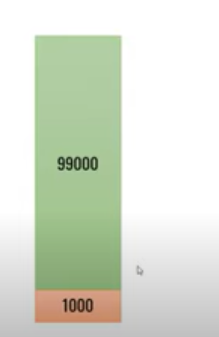

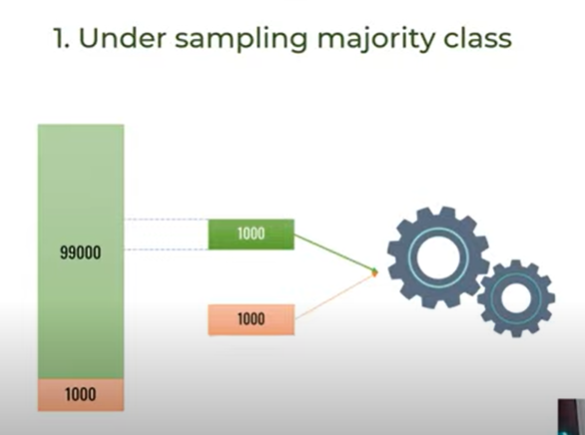

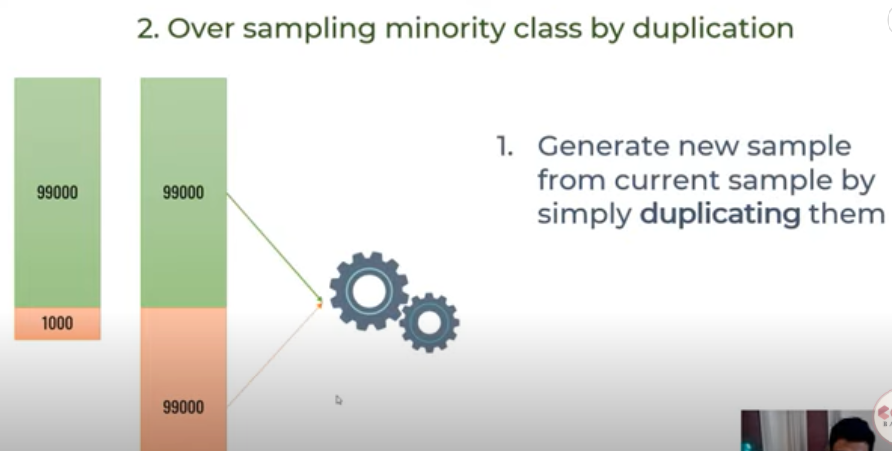

USING K-NN WE PRODUCE SYNTHETIC SAMPLES

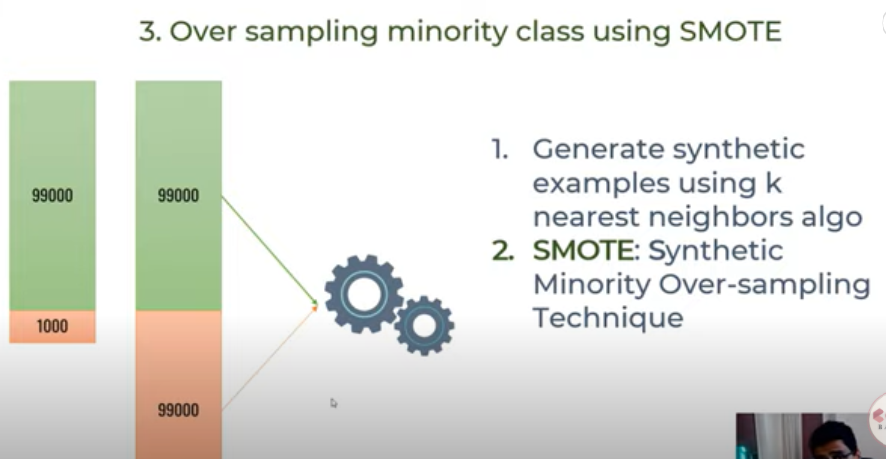


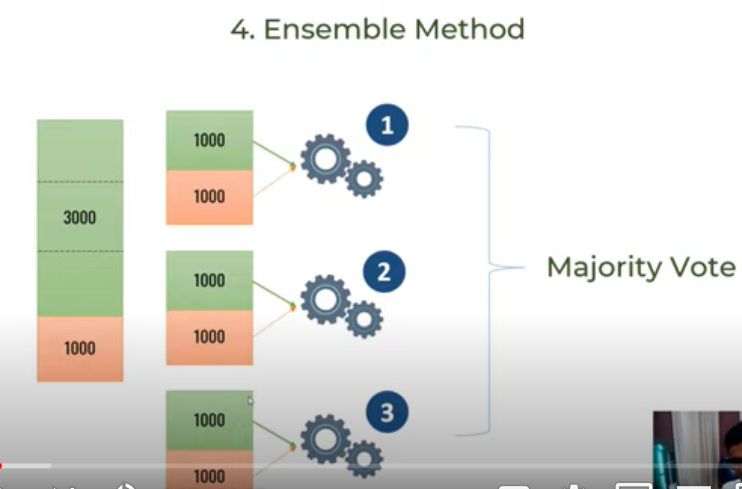


https://medium.com/analytics-vidhya/how-focal-loss-fixes-the-class-imbalance-problem-in-object-detection-3d2e1c4da8d7#:~:text=Focal%20loss%20is%20very%20useful,is%20simple%20and%20highly%20effective
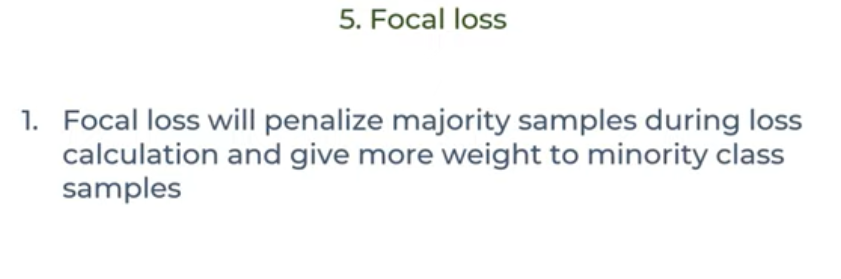


Handling imbalanced data in customer churn prediction
Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model. We will then handle imbalance in data using various techniques and improve f1-score

In [72]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

address="C:/Users/ANTHONY/Desktop/CSV&XLSX/customer_churn.csv"
df = pd.read_csv(address)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [83]:

df.drop('customerID',axis='columns',inplace=True)

df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
df.SeniorCitizen  = df.SeniorCitizen.astype('object')

df = df.dropna()
df1=df.copy()

C:\Users\ANTHONY\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\ANTHONY\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [84]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
                
print_unique_col_values(df1)

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [85]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)
    
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [86]:
############3  one hot encoding
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [87]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [88]:
######3  scaling

cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [89]:
##########  done with all preprocessing

In [90]:
import numpy as np

X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [91]:
y_train.value_counts(),y_test.value_counts()

(0.0    4130
 1.0    1495
 Name: Churn, dtype: int64,
 0.0    1033
 1.0     374
 Name: Churn, dtype: int64)

## ANN

In [92]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 775us/step - loss: 0.5698 - accuracy: 0.7085
Epoch 2/100
176/176 [==============================] - 0s 775us/step - loss: 0.4369 - accuracy: 0.7897
Epoch 3/100
176/176 [==============================] - 0s 871us/step - loss: 0.4232 - accuracy: 0.8028
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8011
Epoch 5/100
176/176 [==============================] - 0s 911us/step - loss: 0.4201 - accuracy: 0.7996
Epoch 6/100
176/176 [==============================] - 0s 843us/step - loss: 0.4177 - accuracy: 0.8015
Epoch 7/100
176/176 [==============================] - 0s 814us/step - loss: 0.4132 - accuracy: 0.8078
Epoch 8/100
176/176 [==============================] - 0s 758us/step - loss: 0.4156 - accuracy: 0.8055
Epoch 9/100
176/176 [==============================] - 0s 712us/step - loss: 0.3981 - accuracy: 0.8217
Epoch 10/100
176/176 [==============================] - 0s 746us/step - los

176/176 [==============================] - 0s 749us/step - loss: 0.3652 - accuracy: 0.8233
Epoch 80/100
176/176 [==============================] - 0s 668us/step - loss: 0.3483 - accuracy: 0.8331
Epoch 81/100
176/176 [==============================] - 0s 734us/step - loss: 0.3689 - accuracy: 0.8190
Epoch 82/100
176/176 [==============================] - 0s 655us/step - loss: 0.3592 - accuracy: 0.8271
Epoch 83/100
176/176 [==============================] - 0s 649us/step - loss: 0.3587 - accuracy: 0.8316
Epoch 84/100
176/176 [==============================] - 0s 661us/step - loss: 0.3577 - accuracy: 0.8314
Epoch 85/100
176/176 [==============================] - 0s 639us/step - loss: 0.3684 - accuracy: 0.8171
Epoch 86/100
176/176 [==============================] - 0s 644us/step - loss: 0.3619 - accuracy: 0.8208
Epoch 87/100
176/176 [==============================] - 0s 639us/step - loss: 0.3569 - accuracy: 0.8263
Epoch 88/100
176/176 [==============================] - 0s 644us/step - loss:

In [61]:
####### we want to improve the score

######3  hence we will try below things

## Mitigating Skewdness of Data

### Method 1: Undersampling

reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [93]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [98]:
df1.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [99]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [100]:
count_class_0, count_class_1

(5163, 1869)

In [101]:
df_class_1.shape,df_class_0.shape   ###### we will make class_0 of same size as class_1

((1869, 27), (5163, 27))

In [102]:
df_class_0_under = df_class_0.sample(count_class_1)
df_class_0_under.shape

(1869, 27)

In [103]:
###### in one step

# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
1    1869
0    1869
Name: Churn, dtype: int64


In [104]:
######  TAKE X AND Y FROM  df_test_under

X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

########   while splitting we should make sure that train and test should be balanced in terms of churn values, else its again imbalance
###### stratify will help with that

In [105]:
####3 checking that 

# Number of classes in training Data
y_train.value_counts(),y_test.value_counts()

(1    1495
 0    1495
 Name: Churn, dtype: int64,
 1    374
 0    374
 Name: Churn, dtype: int64)

In [106]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 712us/step - loss: 0.6670 - accuracy: 0.5917
Epoch 2/100
94/94 [==============================] - 0s 749us/step - loss: 0.5346 - accuracy: 0.7377
Epoch 3/100
94/94 [==============================] - 0s 738us/step - loss: 0.4880 - accuracy: 0.7689
Epoch 4/100
94/94 [==============================] - 0s 739us/step - loss: 0.4919 - accuracy: 0.7658
Epoch 5/100
94/94 [==============================] - 0s 712us/step - loss: 0.4839 - accuracy: 0.7684
Epoch 6/100
94/94 [==============================] - 0s 707us/step - loss: 0.4726 - accuracy: 0.7767
Epoch 7/100
94/94 [==============================] - 0s 716us/step - loss: 0.4651 - accuracy: 0.7731
Epoch 8/100
94/94 [==============================] - 0s 697us/step - loss: 0.4649 - accuracy: 0.7750
Epoch 9/100
94/94 [==============================] - 0s 793us/step - loss: 0.4709 - accuracy: 0.7723
Epoch 10/100
94/94 [==============================] - 0s 986us/step - loss: 0.4580 - accura

94/94 [==============================] - 0s 664us/step - loss: 0.3815 - accuracy: 0.8208
Epoch 82/100
94/94 [==============================] - 0s 654us/step - loss: 0.3823 - accuracy: 0.8273
Epoch 83/100
94/94 [==============================] - 0s 649us/step - loss: 0.3903 - accuracy: 0.8251
Epoch 84/100
94/94 [==============================] - 0s 718us/step - loss: 0.3792 - accuracy: 0.8194
Epoch 85/100
94/94 [==============================] - 0s 815us/step - loss: 0.3723 - accuracy: 0.8353
Epoch 86/100
94/94 [==============================] - 0s 808us/step - loss: 0.3896 - accuracy: 0.8178
Epoch 87/100
94/94 [==============================] - 0s 788us/step - loss: 0.3821 - accuracy: 0.8130
Epoch 88/100
94/94 [==============================] - 0s 654us/step - loss: 0.3930 - accuracy: 0.8151
Epoch 89/100
94/94 [==============================] - 0s 664us/step - loss: 0.3780 - accuracy: 0.8238
Epoch 90/100
94/94 [==============================] - 0s 661us/step - loss: 0.3795 - accuracy: 

### Method2: Oversampling by duplication

In [107]:
count_class_0, count_class_1

(5163, 1869)

In [108]:
df_class_1.sample(2000, replace=True)    ##### replace=True will make it duplciates

##3 will make df_class_1 into 3000 from 1869

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1070,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
6884,0,0,1,0,0.028169,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4063,1,0,0,0,0.126761,1,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
6157,0,0,0,0,0.028169,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
3385,0,0,0,0,0.154930,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4448,1,1,0,0,0.408451,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
5967,0,1,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
251,1,0,1,1,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
320,1,1,0,0,0.746479,1,1,1,1,0,...,1,0,0,0,1,0,1,0,0,0


In [109]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)    ##### replace=True will make it duplciates
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
1    5163
0    5163
Name: Churn, dtype: int64


In [110]:
######## now same steps as before

X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

# Number of classes in training Data
y_train.value_counts()



1    4130
0    4130
Name: Churn, dtype: int64

In [111]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 738us/step - loss: 0.6021 - accuracy: 0.6520
Epoch 2/100
259/259 [==============================] - 0s 753us/step - loss: 0.4904 - accuracy: 0.7671
Epoch 3/100
259/259 [==============================] - 0s 784us/step - loss: 0.4851 - accuracy: 0.7654
Epoch 4/100
259/259 [==============================] - 0s 782us/step - loss: 0.4714 - accuracy: 0.7758
Epoch 5/100
259/259 [==============================] - 0s 764us/step - loss: 0.4836 - accuracy: 0.7678
Epoch 6/100
259/259 [==============================] - 0s 770us/step - loss: 0.4673 - accuracy: 0.7783
Epoch 7/100
259/259 [==============================] - 0s 757us/step - loss: 0.4679 - accuracy: 0.7769
Epoch 8/100
259/259 [==============================] - 0s 722us/step - loss: 0.4706 - accuracy: 0.7727
Epoch 9/100
259/259 [==============================] - 0s 691us/step - loss: 0.4673 - accuracy: 0.7770
Epoch 10/100
259/259 [==============================] - 0s 730us/step - l

259/259 [==============================] - 0s 819us/step - loss: 0.3739 - accuracy: 0.8310
Epoch 80/100
259/259 [==============================] - 0s 811us/step - loss: 0.3909 - accuracy: 0.8120
Epoch 81/100
259/259 [==============================] - 0s 935us/step - loss: 0.3751 - accuracy: 0.8313
Epoch 82/100
259/259 [==============================] - 0s 769us/step - loss: 0.3894 - accuracy: 0.8233
Epoch 83/100
259/259 [==============================] - 0s 691us/step - loss: 0.3709 - accuracy: 0.8316
Epoch 84/100
259/259 [==============================] - 0s 788us/step - loss: 0.3817 - accuracy: 0.8297
Epoch 85/100
259/259 [==============================] - 0s 769us/step - loss: 0.3736 - accuracy: 0.8301
Epoch 86/100
259/259 [==============================] - 0s 749us/step - loss: 0.3859 - accuracy: 0.8226
Epoch 87/100
259/259 [==============================] - 0s 692us/step - loss: 0.3796 - accuracy: 0.8251
Epoch 88/100
259/259 [==============================] - 0s 678us/step - loss:

### Method3: SMOTE

SMOTE IS NOT DUPLICATING AS ABOVE, HERE IT WILL CREATE SYNTHETIC ROWS FOR DFS BASED ON KNN

In [112]:
df2.shape,df1.shape

## df2 = one hot encoding

## df1= without one hot

((7032, 27), (7032, 20))

In [113]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

####3   y is imbalanced

y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [114]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

In [115]:
######## now same steps as before


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

# Number of classes in training Data
y_train.value_counts()



1    4130
0    4130
Name: Churn, dtype: int64

In [116]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 745us/step - loss: 0.5830 - accuracy: 0.7098
Epoch 2/100
259/259 [==============================] - 0s 753us/step - loss: 0.4742 - accuracy: 0.7818
Epoch 3/100
259/259 [==============================] - 0s 827us/step - loss: 0.4695 - accuracy: 0.7762
Epoch 4/100
259/259 [==============================] - 0s 807us/step - loss: 0.4681 - accuracy: 0.7757
Epoch 5/100
259/259 [==============================] - 0s 680us/step - loss: 0.4467 - accuracy: 0.7885
Epoch 6/100
259/259 [==============================] - 0s 838us/step - loss: 0.4447 - accuracy: 0.7916
Epoch 7/100
259/259 [==============================] - 0s 755us/step - loss: 0.4354 - accuracy: 0.7966
Epoch 8/100
259/259 [==============================] - 0s 811us/step - loss: 0.4448 - accuracy: 0.7875
Epoch 9/100
259/259 [==============================] - 0s 930us/step - loss: 0.4365 - accuracy: 0.7967
Epoch 10/100
259/259 [==============================] - 0s 765us/step - l

259/259 [==============================] - 0s 854us/step - loss: 0.3423 - accuracy: 0.8523
Epoch 80/100
259/259 [==============================] - 0s 834us/step - loss: 0.3388 - accuracy: 0.8516
Epoch 81/100
259/259 [==============================] - 0s 695us/step - loss: 0.3421 - accuracy: 0.8513
Epoch 82/100
259/259 [==============================] - 0s 691us/step - loss: 0.3488 - accuracy: 0.8435
Epoch 83/100
259/259 [==============================] - 0s 639us/step - loss: 0.3441 - accuracy: 0.8540
Epoch 84/100
259/259 [==============================] - 0s 811us/step - loss: 0.3371 - accuracy: 0.8562
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3441 - accuracy: 0.8502
Epoch 86/100
259/259 [==============================] - 0s 761us/step - loss: 0.3437 - accuracy: 0.8515
Epoch 87/100
259/259 [==============================] - 0s 923us/step - loss: 0.3384 - accuracy: 0.8547
Epoch 88/100
259/259 [==============================] - 0s 784us/step - loss: 0

In [117]:
#######3 improved score

### Method4: Use of Ensemble with undersampling

In [118]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [119]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [121]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

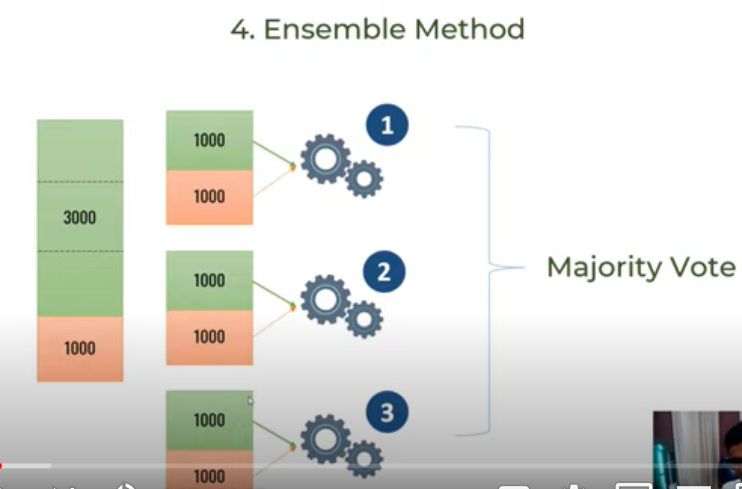

lets divide it into almost 3 classes as seen in figure initially

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [125]:
######## only doing it for train x and train y

df3 = X_train.copy()
df3['Churn'] = y_train

#df3 have now 5625 rows[4130 + 1869   of o and 1]

In [126]:
df3.shape

(5625, 27)

In [128]:
df3_class0 = df3[df3.Churn==0]   ### df3_class0 will have total of 4130 rows
df3_class1 = df3[df3.Churn==1]    ### df3_class0 will have total of 1495 rows

In [129]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train    



In [130]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 738us/step - loss: 0.6682 - accuracy: 0.5788
Epoch 2/100
94/94 [==============================] - 0s 836us/step - loss: 0.5265 - accuracy: 0.7524
Epoch 3/100
94/94 [==============================] - 0s 868us/step - loss: 0.4884 - accuracy: 0.7699
Epoch 4/100
94/94 [==============================] - 0s 729us/step - loss: 0.4876 - accuracy: 0.7670
Epoch 5/100
94/94 [==============================] - 0s 729us/step - loss: 0.4963 - accuracy: 0.7570
Epoch 6/100
94/94 [==============================] - 0s 814us/step - loss: 0.4782 - accuracy: 0.7726
Epoch 7/100
94/94 [==============================] - 0s 772us/step - loss: 0.4700 - accuracy: 0.7754
Epoch 8/100
94/94 [==============================] - 0s 772us/step - loss: 0.4752 - accuracy: 0.7701
Epoch 9/100
94/94 [==============================] - 0s 814us/step - loss: 0.4538 - accuracy: 0.7851
Epoch 10/100
94/94 [==============================] - 0s 847us/step - loss: 0.4673 - accura

94/94 [==============================] - 0s 739us/step - loss: 0.4025 - accuracy: 0.8139
Epoch 82/100
94/94 [==============================] - 0s 729us/step - loss: 0.4135 - accuracy: 0.8132
Epoch 83/100
94/94 [==============================] - 0s 761us/step - loss: 0.3944 - accuracy: 0.8237
Epoch 84/100
94/94 [==============================] - 0s 718us/step - loss: 0.4041 - accuracy: 0.8139
Epoch 85/100
94/94 [==============================] - 0s 675us/step - loss: 0.4057 - accuracy: 0.8143
Epoch 86/100
94/94 [==============================] - 0s 707us/step - loss: 0.4024 - accuracy: 0.8223
Epoch 87/100
94/94 [==============================] - 0s 632us/step - loss: 0.4007 - accuracy: 0.8178
Epoch 88/100
94/94 [==============================] - 0s 612us/step - loss: 0.3981 - accuracy: 0.8236
Epoch 89/100
94/94 [==============================] - 0s 864us/step - loss: 0.3919 - accuracy: 0.8312
Epoch 90/100
94/94 [==============================] - 0s 857us/step - loss: 0.3961 - accuracy: 

In [131]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 772us/step - loss: 0.6767 - accuracy: 0.5968
Epoch 2/100
94/94 [==============================] - 0s 814us/step - loss: 0.5346 - accuracy: 0.7479
Epoch 3/100
94/94 [==============================] - 0s 879us/step - loss: 0.4992 - accuracy: 0.7639
Epoch 4/100
94/94 [==============================] - 0s 847us/step - loss: 0.4921 - accuracy: 0.7645
Epoch 5/100
94/94 [==============================] - 0s 836us/step - loss: 0.4842 - accuracy: 0.7596
Epoch 6/100
94/94 [==============================] - 0s 922us/step - loss: 0.4837 - accuracy: 0.7560
Epoch 7/100
94/94 [==============================] - 0s 868us/step - loss: 0.4866 - accuracy: 0.7614
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4946 - accuracy: 0.7522
Epoch 9/100
94/94 [==============================] - 0s 922us/step - loss: 0.4596 - accuracy: 0.7757
Epoch 10/100
94/94 [==============================] - 0s 804us/step - loss: 0.4670 - accuracy

94/94 [==============================] - 0s 739us/step - loss: 0.3644 - accuracy: 0.8293
Epoch 82/100
94/94 [==============================] - 0s 739us/step - loss: 0.3785 - accuracy: 0.8203
Epoch 83/100
94/94 [==============================] - 0s 686us/step - loss: 0.3935 - accuracy: 0.8164
Epoch 84/100
94/94 [==============================] - 0s 632us/step - loss: 0.3858 - accuracy: 0.8213
Epoch 85/100
94/94 [==============================] - 0s 639us/step - loss: 0.3661 - accuracy: 0.8286
Epoch 86/100
94/94 [==============================] - 0s 937us/step - loss: 0.3741 - accuracy: 0.8164
Epoch 87/100
94/94 [==============================] - 0s 975us/step - loss: 0.3696 - accuracy: 0.8275
Epoch 88/100
94/94 [==============================] - 0s 772us/step - loss: 0.3652 - accuracy: 0.8290
Epoch 89/100
94/94 [==============================] - 0s 777us/step - loss: 0.3680 - accuracy: 0.8229
Epoch 90/100
94/94 [==============================] - 0s 804us/step - loss: 0.3599 - accuracy: 

In [132]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 747us/step - loss: 0.6192 - accuracy: 0.6729
Epoch 2/100
83/83 [==============================] - 0s 875us/step - loss: 0.5150 - accuracy: 0.7598
Epoch 3/100
83/83 [==============================] - 0s 814us/step - loss: 0.4761 - accuracy: 0.7790
Epoch 4/100
83/83 [==============================] - 0s 814us/step - loss: 0.4957 - accuracy: 0.7574
Epoch 5/100
83/83 [==============================] - 0s 729us/step - loss: 0.4771 - accuracy: 0.7741
Epoch 6/100
83/83 [==============================] - 0s 778us/step - loss: 0.4874 - accuracy: 0.7572
Epoch 7/100
83/83 [==============================] - 0s 802us/step - loss: 0.4746 - accuracy: 0.7741
Epoch 8/100
83/83 [==============================] - 0s 802us/step - loss: 0.4726 - accuracy: 0.7698
Epoch 9/100
83/83 [==============================] - 0s 778us/step - loss: 0.4564 - accuracy: 0.7776
Epoch 10/100
83/83 [==============================] - 0s 814us/step - loss: 0.4567 - accura

83/83 [==============================] - 0s 705us/step - loss: 0.3547 - accuracy: 0.8432
Epoch 82/100
83/83 [==============================] - 0s 826us/step - loss: 0.3670 - accuracy: 0.8469
Epoch 83/100
83/83 [==============================] - 0s 705us/step - loss: 0.3703 - accuracy: 0.8367
Epoch 84/100
83/83 [==============================] - 0s 681us/step - loss: 0.3637 - accuracy: 0.8340
Epoch 85/100
83/83 [==============================] - 0s 798us/step - loss: 0.3670 - accuracy: 0.8458
Epoch 86/100
83/83 [==============================] - 0s 592us/step - loss: 0.3656 - accuracy: 0.8375
Epoch 87/100
83/83 [==============================] - 0s 580us/step - loss: 0.3777 - accuracy: 0.8222
Epoch 88/100
83/83 [==============================] - 0s 634us/step - loss: 0.3682 - accuracy: 0.8350
Epoch 89/100
83/83 [==============================] - 0s 656us/step - loss: 0.3795 - accuracy: 0.8341
Epoch 90/100
83/83 [==============================] - 0s 571us/step - loss: 0.3628 - accuracy: 

In [134]:
#####  now we will look at majority
 
###  ie, if by any chance out of 3, one model is saying 0 and rest two as 1, then the prediction will be a 1

In [135]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [136]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.48      0.76      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.72      0.73      1407



In [137]:
#####  focal loss